In [10]:
# Q7)
param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best k value:", grid_search.best_params_['n_neighbors'])


Best k value: 3


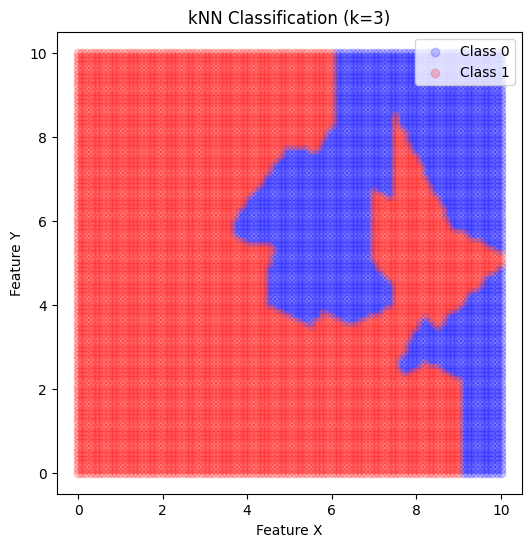

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.datasets import make_classification


#Q4)
X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, Y_train)
Y_test_pred = kNN.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(X_test[Y_test_pred == 0][:, 0], X_test[Y_test_pred == 0][:, 1], color='blue', alpha=0.2, label='Class 0')
plt.scatter(X_test[Y_test_pred == 1][:, 0], X_test[Y_test_pred == 1][:, 1], color='red', alpha=0.2, label='Class 1')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.title("kNN Classification (k=3)")
plt.show()


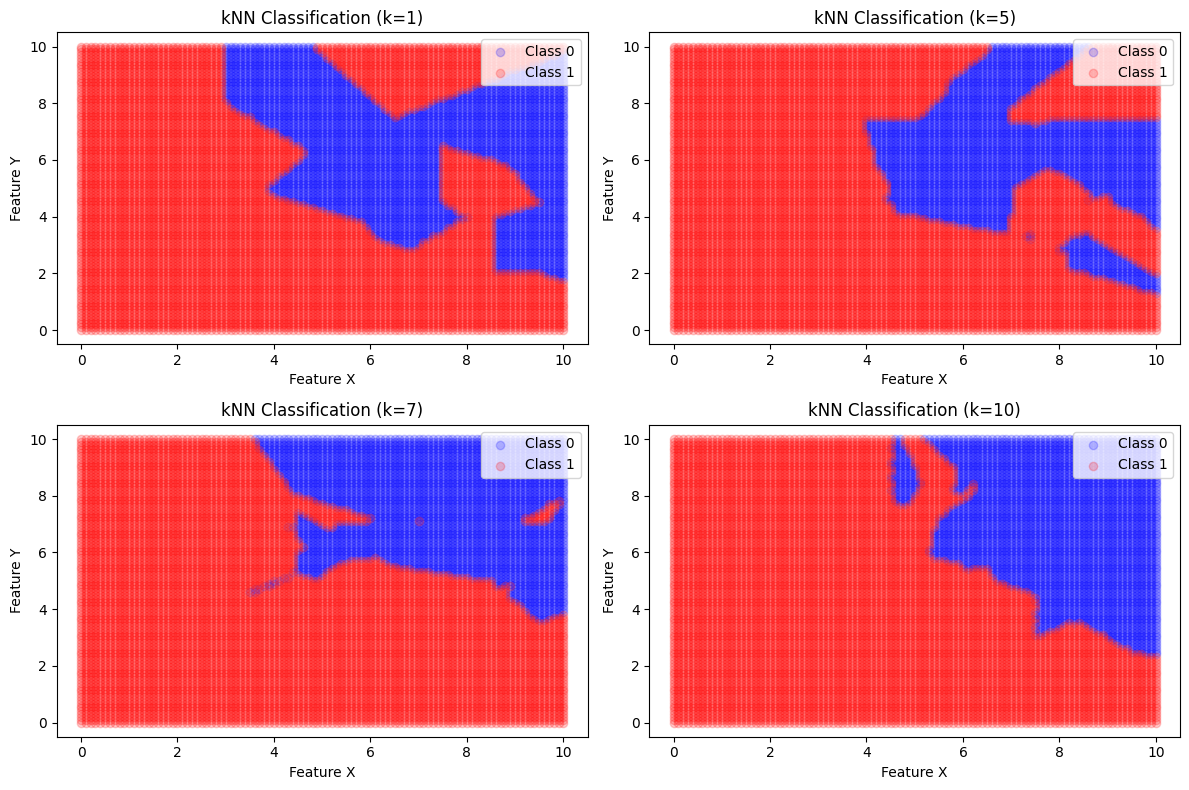

In [8]:
#Q5)
k_values = [1, 5, 7, 10]
plt.figure(figsize=(12, 8))
for i, k in enumerate(k_values):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, Y_train)
    Y_test_pred = kNN.predict(X_test)
    plt.subplot(2, 2, i+1)
    plt.scatter(X_test[Y_test_pred == 0][:, 0], X_test[Y_test_pred == 0][:, 1], color='blue', alpha=0.2, label='Class 0')
    plt.scatter(X_test[Y_test_pred == 1][:, 0], X_test[Y_test_pred == 1][:, 1], color='red', alpha=0.2, label='Class 1')
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.legend()
    plt.title(f"kNN Classification (k={k})")
plt.tight_layout()
plt.show()

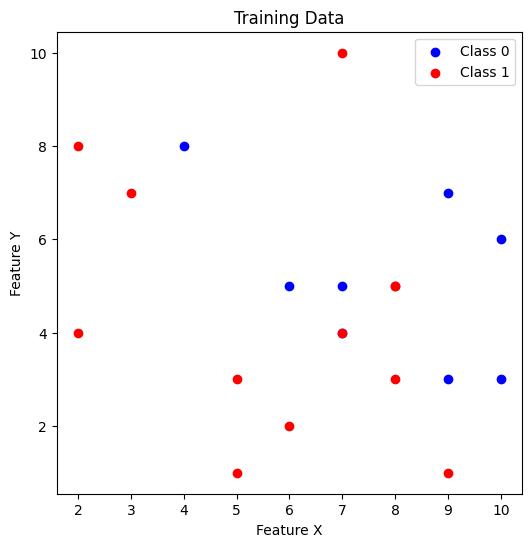

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.datasets import make_classification

#Q3)
np.random.seed(42)
X_train = np.random.randint(1, 11, size=(20, 2))
Y_train = np.random.choice([0, 1], size=20)


plt.figure(figsize=(6, 6))
plt.scatter(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], color='red', label='Class 1')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.title("Training Data")
plt.show()

In [3]:
#Q2)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

np.random.seed(42)
X_reg = np.random.rand(100, 1) * 10
y_reg = 2 * X_reg.squeeze() + np.random.randn(100) * 2


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train_reg, y_train_reg)
y_pred_reg = model.predict(X_test_reg)


mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}")
print(f"R2: {r2:.2f}")

MSE: 2.61
RMSE: 1.62
MAPE: 0.16
R2: 0.93


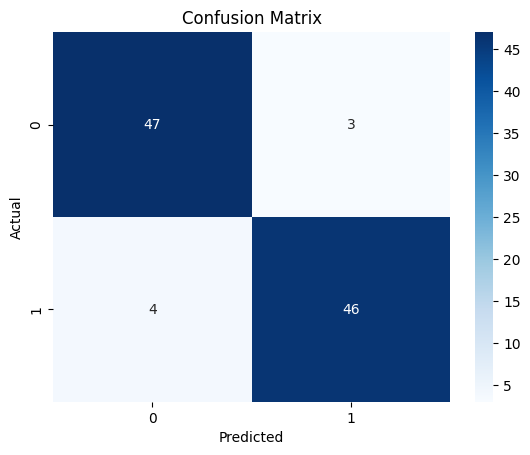

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [9]:
#Q6)

X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, Y_train)
Y_pred = kNN.predict(X_test)


conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


print(classification_report(Y_test, Y_pred))

In [5]:
#Q1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification


X, Y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)
X_train_proj, X_test_proj, Y_train_proj, Y_test_proj = train_test_split(X, Y, test_size=0.2, random_state=42)

kNN_proj = KNeighborsClassifier(n_neighbors=3)
kNN_proj.fit(X_train_proj, Y_train_proj)
Y_pred_proj = kNN_proj.predict(X_test_proj)
Y_train_pred_proj = kNN_proj.predict(X_train_proj)


def evaluate_model(y_true, y_pred, data_type="Test"):
    """
    Evaluates the classification model and prints the metrics.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        data_type (str): "Train" or "Test" to indicate the data being evaluated.
    """
    print(f"\n--- {data_type} Data Evaluation ---")


    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix ({data_type} Data):\n", conf_matrix)


    print(f"\nClassification Report ({data_type} Data):\n", classification_report(y_true, y_pred))


    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    print(f"\nPrecision ({data_type} Data): {precision}")
    print(f"Recall ({data_type} Data): {recall}")
    print(f"F1-Score ({data_type} Data): {f1}")


    training_accuracy = np.mean(y_pred == y_true)
    test_accuracy = np.mean(Y_pred_proj == Y_test_proj)

    print(f"\nTraining Accuracy: {training_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")

    if training_accuracy > 0.95 and test_accuracy < 0.85:
      print(f"\nModel is likely OVERFITTING.")
    elif training_accuracy < 0.70 and test_accuracy < 0.70:
      print(f"\nModel is likely UNDERFITTING.")
    else:
      print(f"\nModel is a REGULAR FIT.")

evaluate_model(Y_train_proj, Y_train_pred_proj, "Train")

evaluate_model(Y_test_proj, Y_pred_proj, "Test")


--- Train Data Evaluation ---
Confusion Matrix (Train Data):
 [[196   3]
 [  9 192]]

Classification Report (Train Data):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       199
           1       0.98      0.96      0.97       201

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400


Precision (Train Data): [0.95609756 0.98461538]
Recall (Train Data): [0.98492462 0.95522388]
F1-Score (Train Data): [0.97029703 0.96969697]

Training Accuracy: 0.97
Test Accuracy: 0.93

Model is a REGULAR FIT.

--- Test Data Evaluation ---
Confusion Matrix (Test Data):
 [[47  3]
 [ 4 46]]

Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.94      0.92      0.93        50

    accuracy                           0.93       100
   